In [2]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import random

# machine leanring packages

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# import xgboost as xgb

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata


In [ ]:
# TO DO
# 
# Kalman 
# structural bayeisan time series
# feature extration on time series


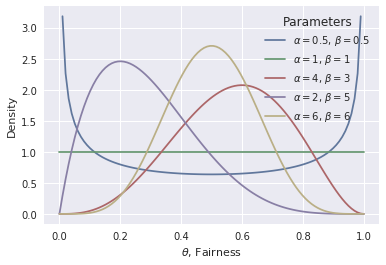

In [11]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn as sns


if __name__ == "__main__":
    sns.set_palette("deep", desat=.6)
    sns.set_context(rc={"figure.figsize": (8, 4)})
    x = np.linspace(0, 1, 100)
    params = [
        (0.5, 0.5),
        (1, 1),
        (4, 3),
        (2, 5),
        (6, 6)
    ]
    for p in params:
        y = beta.pdf(x, p[0], p[1])
        plt.plot(x, y, label="$\\alpha=%s$, $\\beta=%s$" % p)
    plt.xlabel("$\\theta$, Fairness")
    plt.ylabel("Density")
    plt.legend(title="Parameters")
    plt.show()

In [13]:
from scipy.stats import beta

rv = beta(1, 0.5)

In [14]:
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

<class 'pymc3.model.TransformedRV'>
<class 'pymc3.model.ObservedRV'>


logp = -10.252, ||grad|| = 15: 100%|██████████| 7/7 [00:00<00:00, 1151.11it/s]
100%|██████████| 100500/100500 [00:19<00:00, 5265.49it/s]


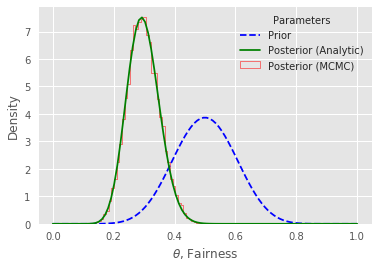

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3
import scipy.stats as stats

plt.style.use("ggplot")

# Parameter values for prior and analytic posterior
n = 50
z = 10

alpha = 12
beta = 12

alpha_post = 22
beta_post = 52


# How many iterations of the Metropolis 
# algorithm to carry out for MCMC
iterations = 100000


# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", alpha=alpha, beta=beta)
    print type(theta)

    # Define the Bernoulli likelihood function
    y = pymc3.Binomial("y", n=n, p=theta, observed=z)
    print type(y)
    
    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP() 

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)
    
    
    
# Plot the posterior histogram from MCMC analysis
bins=50
plt.hist(
    trace["theta"], bins, 
    histtype="step", normed=True, 
    label="Posterior (MCMC)", color="red"
)

# Plot the analytic prior and posterior beta distributions
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta), 
    "--", label="Prior", color="blue"
)
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post), 
    label='Posterior (Analytic)', color="green"
)

# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()

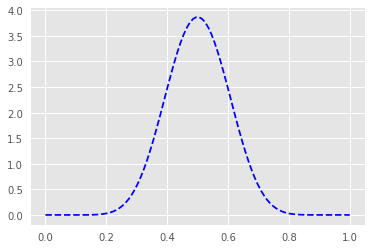

In [27]:
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta), 
    "--", label="Prior", color="blue")

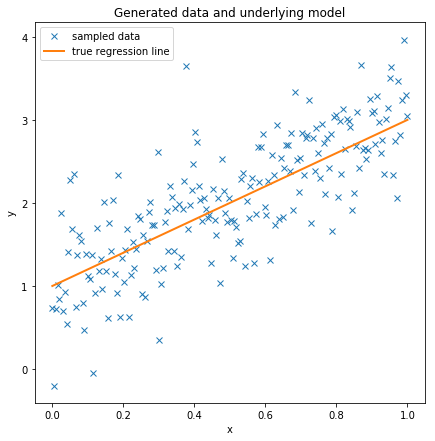

In [1]:

%matplotlib inline

from pymc3 import  *

import numpy as np
import matplotlib.pyplot as plt


size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

data = dict(x=x, y=y)


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x, y, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [2]:
with Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy('sigma', beta=10, testval=1.)
    intercept = Normal('Intercept', 0, sd=20)
    x_coeff = Normal('x', 0, sd=20)

    # Define likelihood
    likelihood = Normal('y', mu=intercept + x_coeff * x,
                        sd=sigma, observed=y)

    # Inference!
    trace = sample(3000, njobs=2) #

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 3498/3500 [00:08<00:00, 417.43it/s]
/usr/local/lib/python2.7/dist-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.883644298059, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 3500/3500 [00:08<00:00, 417.07it/s]

In [3]:
trace.varnames

['sigma_log__', 'Intercept', 'x', 'sigma']

In [4]:
with Model() as model:
    # specify glm and pass in data. The resulting linear model, its likelihood and 
    # and all its parameters are automatically added to our model.
    GLM.from_formula('y ~ x', data)
    trace = sample(progressbar=False, tune=1000, njobs=4) # draw posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


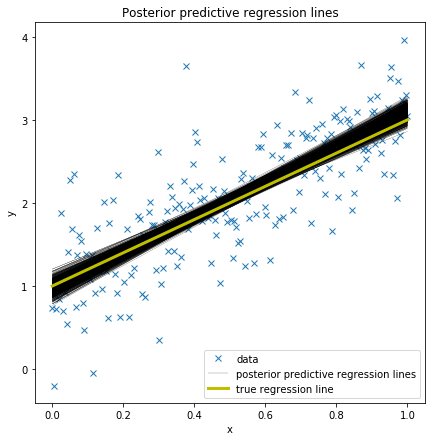

In [4]:
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'x', label='data')
plot_posterior_predictive_glm(trace, samples=1000,
                              label='posterior predictive regression lines')
plt.plot(x, true_regression_line, label='true regression line', lw=3., c='y')

plt.title('Posterior predictive regression lines')
plt.legend(loc=0)
plt.xlabel('x')
plt.ylabel('y');

In [5]:
trace.varnames

['Intercept', 'x', 'sd_log__', 'sd']

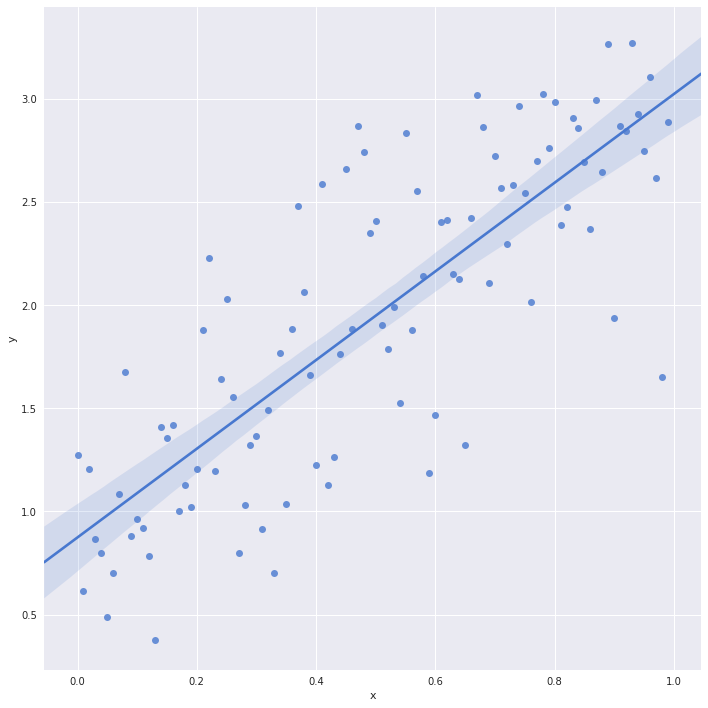

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as plt


sns.set(style="darkgrid", palette="muted")


def simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq):
    """
    Simulate a random dataset using a noisy
    linear process.

    N: Number of data points to simulate
    beta_0: Intercept
    beta_1import matplotlib
: Slope of univariate predictor, X
    """
    # Create a pandas DataFrame with column 'x' containing
    # N uniformly sampled values between 0.0 and 1.0
    df = pd.DataFrame(
        {"x": 
            np.random.RandomState(42).choice(
                map(
                    lambda x: float(x)/100.0, 
                    np.arange(100)
                ), N, replace=False
            )
        }
    )

    # Use a linear model (y ~ beta_0 + beta_1*x + epsilon) to 
    # generate a column 'y' of responses based on 'x'
    eps_mean = 0.0
    df["y"] = beta_0 + beta_1*df["x"] + np.random.RandomState(42).normal(
        eps_mean, eps_sigma_sq, N
    )

    return df


if __name__ == "__main__":
    # These are our "true" parameters
    beta_0 = 1.0  # Intercept
    beta_1 = 2.0  # Slope

    # Simulate 100 data points, with a variance of 0.5
    N = 100
    eps_sigma_sq = 0.5

    # Simulate the "linear" data using the above parameters
    df = simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq)

    # Plot seeborn pythonthe data, and a frequentist linear regression fit
    # using the seaborn package
    sns_res = sns.lmplot(x="x", y="y", data=df, size=10)
    
#     plt.xlim(0.0, 1.0)
#     
#     plt.xlim(0.0,1.0)

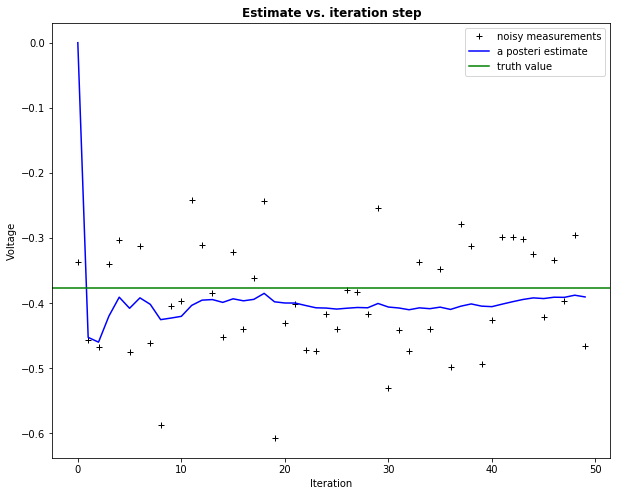

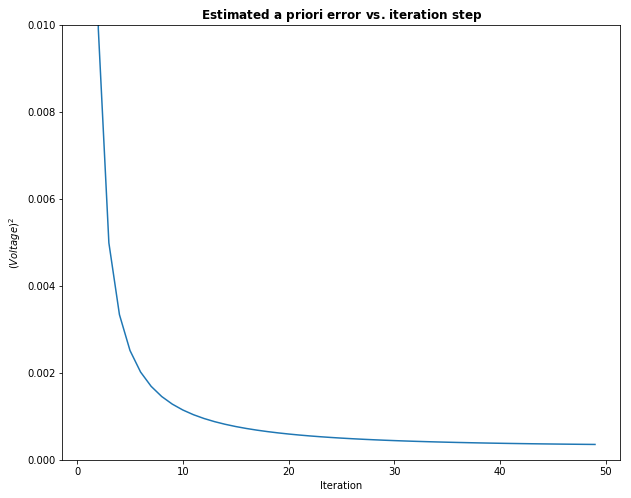

In [5]:
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html

# by Andrew D. Straw

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])
plt.show()

In [2]:
# from models.tutorials.rnn.translate import data_utils

ImportError: No module named models.tutorials.rnn.translate

In [5]:
import os
import re

In [10]:
PAD = u"_PAD"
print PAD

_PAD


In [6]:
_WORD_SPLIT = re.compile(b"([.,!?\"':;)(])")
_DIGIT_RE = re.compile(br"\d")


In [7]:
print _WORD_SPLIT,_DIGIT_RE

<_sre.SRE_Pattern object at 0x7f09344b5a80> <_sre.SRE_Pattern object at 0x7f09344f3390>


In [2]:
import sys
sys.path.append("/usr/local/lib/python2.7/dist-packages/tensorflow/models/tutorials/rnn/translate")

from translate import data_utils


# import translate
# .data_utils
# import tensorflow.models
# import data_utils
# import seq2seq_model

In [ ]:
# Reference:
# http://people.duke.edu/~rnau/411home.htm
# http://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/


# http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb

In [ ]:
# Feature extraction:

# stationarity test 

# Trend: fitting, differencing
# Local pattern: wavelent transformation
# Seasonality: test, autocorrelation, Fourier transformation


In [3]:
files_list=["../dataset/dataset_ts/stock_xtrain_statis.dat", \
            "../dataset/dataset_ts/stock_xtest_statis.dat",\
#             "../dataset/dataset_ts/stock_ytrain.dat", \
#             "../dataset/dataset_ts/stock_ytest.dat"
           ]


# xtrain, ytrain, xtest, ytest = \
# prepare_train_test_data( True, files_list)

xtr = np.load(files_list[0])
xts = np.load(files_list[1])
print np.shape(xtr), np.shape(xts)

(4000,) (1500,)


In [ ]:
# features: time stamps, autoregressive value, trend 

def expand_x_trend_GP( x ):
    cnt = len(x)
    return [ x[i]-x[i-1] for i in range(1, cnt) ]

def expand_x_lag( current_step, x, max_step ):
    cnt = len(x)
    return [ x[i-current_step] for i in range( max_step, cnt )]
    
def prepare_train_test_data_GP(bool_add_trend, bool_add_lag_value, files_list, lag_steps):
                          
    dta_tr = np.load(files_list[0])
    dta_ts = np.load(files_list[1])
                    
    cnt_tr = len(dta_tr)
    cnt_ts = len(dta_ts)np.random.randint(0, len(trace), samples)
    
    x_tr = []
    x_ts = []
    
    y_tr = []
    y_ts = []
    
    
#   trends
    if bool_add_trend == True:
        
        trend_tr = expand_x_trend_GP( dta_tr )
        trend_ts = expand_x_trend_GP( dta_ts )
        
        x_tr.append( trend_tr )
        x_ts.append( trend_ts )
        
#       time ticks
        x_tr.append( range(cnt_tr-1) )
        x_ts.append( range(cnt_tr-1+cnt_ts-1) )       
        
    else:
        
#       time ticks
        x_tr.append( range(cnt_tr) )
        x_ts.append( range(cnt_tr, cnt_ts+cnt_tr) )
        
    
#   autoregressive values
    if bool_add_lag_value == True:
        
        for i in range(lag_steps):
            x_tr.append( x_ts )
            x_ts.append( range(cnt_tr-1+cnt_ts-1) )   
            
            
    
        
#   normalize x in training and testing datasets
    xtest = conti_normalization_test_dta(  xtest_df, xtrain_df )
    xtrain= conti_normalization_train_dta( xtrain_df )
        
    return xtrain, ytr, xtest, yts

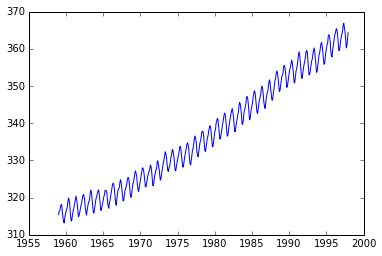

In [13]:
data = fetch_mldata('mauna-loa-atmospheric-co2').data
X = data[:, [1]]
y = data[:, 0 ]


plt.plot(X,y)

In [17]:
# Kernel with optimized parameters
k1 = 5 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, np.inf))  # noise terms

kernel = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0,
                              normalize_y=True)
gp.fit(X, y)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))


Learned kernel: 34.5**2 * RBF(length_scale=41.8) + 3.26**2 * RBF(length_scale=180) * ExpSineSquared(length_scale=1.44, periodicity=1) + 0.446**2 * RationalQuadratic(alpha=17.7, length_scale=0.957) + 0.197**2 * RBF(length_scale=0.138) + WhiteKernel(noise_level=0.0336)
Log-marginal-likelihood: -83.214


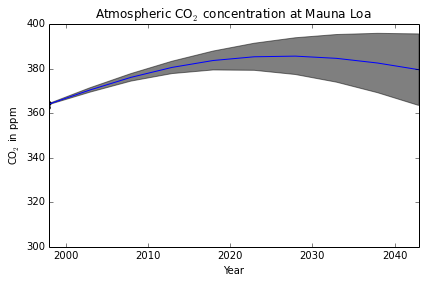

In [23]:
# X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]

X_ = np.array([X.max()+i*5 for i in range(10)])
X_ = np.reshape(X_, [-1,1])

y_pred, y_std = gp.predict(X_, return_std=True)


# Illustration
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                 alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()


In [16]:
np.random.randint(0, len(trace), samples)print "vocab%d.enc" % 12
print ".ids%d" % 12

vocab12.enc
.ids12


In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set_context('paper')
sns.set_style('darkgrid')

import pymc3 as pm, theano.tensor as tt


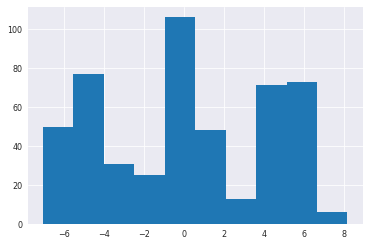

In [2]:
np.random.seed(12345) # set random seed for reproducibility

k = 3
ndata = 500
spread = 5
centers = np.array([-spread, 0, spread])

# simulate data from mixture distribution
v = np.random.randint(0, k, ndata)
data = centers[v] + np.random.randn(ndata)

plt.hist(data);

In [ ]:
# PyMC3 
Gaussian mixture
HMM
State space


In [4]:
# setup model
model = pm.Model()
with model:
    # cluster sizes
    p = pm.Dirichlet('p', a=np.array([1., 1., 1.]), shape=k)
    # ensure all clusters have some points
    p_min_potential = pm.Potential('p_min_potential', tt.switch(tt.min(p) < .1, -np.inf, 0))


    # cluster centers
    means = pm.Normal('means', mu=[0, 0, 0], sd=15, shape=k)
    # break symmetry
    order_means_potential = pm.Potential('order_means_potential',
                                         tt.switch(means[1]-means[0] < 0, -np.inf, 0)
                                         + tt.switch(means[2]-means[1] < 0, -np.inf, 0))

    # measurement error
    sd = pm.Uniform('sd', lower=0, upper=20)

    # latent cluster of each observation
    category = pm.Categorical('category',
                              p=p,
                              shape=ndata)

    # likelihood for each observed value
    points = pm.Normal('obs',
                       mu=means[category],
                       sd=sd,
                       observed=data)

In [5]:

# fit model
with model:
    step1 = pm.Metropolis(vars=[p, sd, means])
    step2 = pm.ElemwiseCategorical(vars=[category], values=[0, 1, 2])
    tr = pm.sample(10000, step=[step1, step2])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  """
100%|██████████| 10500/10500 [02:44<00:00, 63.85it/s]


In [6]:
tr.varnames

['p_stickbreaking__', 'means', 'sd_interval__', 'category', 'p', 'sd']

In [10]:
np.shape(tr['category'])

(10000, 500)